In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
historical_data = pd.read_csv('../data/historical_data/historical_data_2021-10-01_2022-10-01.csv')

In [3]:
historical_data.columns

Index(['DateTime', 'Bus', 'Energy consumed driving', 'SOC used driving',
       'SOC used idling', 'Time charging', 'Time driving consuming',
       'Time driving'],
      dtype='object')

In [4]:
weather_data = pd.read_csv('../data/weather_data/banff_hourly_weather_2022.csv')

In [5]:
historical_data['DateTime'] = pd.to_datetime(historical_data['DateTime'])
weather_data['Date/Time (LST)'] = pd.to_datetime(weather_data['Date/Time (LST)'])

In [6]:
beb_data = historical_data.merge(how='left', right=weather_data , left_on='DateTime', right_on='Date/Time (LST)')

In [7]:
beb_data

,DateTime,Bus,Energy consumed driving,SOC used driving,SOC used idling,Time charging,Time driving consuming,Time driving,Longitude (x),Latitude (y),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,2021-11-30 14:00:00,1030 - Hare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-11-30 15:00:00,1030 - Hare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-11-30 16:00:00,1030 - Hare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-11-30 17:00:00,1030 - Hare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-11-30 18:00:00,1030 - Hare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29765,2022-10-01 18:00:00,1035 - Cougar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29766,2022-10-01 19:00:00,1035 - Cougar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29767,2022-10-01 20:00:00,1035 - Cougar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29768,2022-10-01 21:00:00,1035 - Cougar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
beb_data.columns

Index(['DateTime', 'Bus', 'Energy consumed driving', 'SOC used driving',
       'SOC used idling', 'Time charging', 'Time driving consuming',
       'Time driving', 'Longitude (x)', 'Latitude (y)', 'Station Name',
       'Climate ID', 'Date/Time (LST)', 'Year', 'Month', 'Day', 'Time (LST)',
       'Temp (°C)', 'Temp Flag', 'Dew Point Temp (°C)', 'Dew Point Temp Flag',
       'Rel Hum (%)', 'Rel Hum Flag', 'Precip. Amount (mm)',
       'Precip. Amount Flag', 'Wind Dir (10s deg)', 'Wind Dir Flag',
       'Wind Spd (km/h)', 'Wind Spd Flag', 'Visibility (km)',
       'Visibility Flag', 'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx',
       'Hmdx Flag', 'Wind Chill', 'Wind Chill Flag', 'Weather'],
      dtype='object')

In [9]:
beb_data.drop(inplace=True,columns=[ 'Station Name',
       'Climate ID', 'Temp Flag', 'Dew Point Temp Flag',
       'Rel Hum Flag', 'Precip. Amount Flag',  'Wind Dir Flag',
        'Wind Spd Flag', 'Stn Press (kPa)', 'Visibility (km)',
       'Visibility Flag','Stn Press Flag', 'Hmdx',
       'Hmdx Flag', 'Wind Chill Flag', 'Weather', ] )

In [10]:
beb_data

,DateTime,Bus,Energy consumed driving,SOC used driving,SOC used idling,Time charging,Time driving consuming,Time driving,Longitude (x),Latitude (y),...,Month,Day,Time (LST),Temp (°C),Dew Point Temp (°C),Rel Hum (%),Precip. Amount (mm),Wind Dir (10s deg),Wind Spd (km/h),Wind Chill
0,2021-11-30 14:00:00,1030 - Hare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-11-30 15:00:00,1030 - Hare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-11-30 16:00:00,1030 - Hare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-11-30 17:00:00,1030 - Hare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-11-30 18:00:00,1030 - Hare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29765,2022-10-01 18:00:00,1035 - Cougar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29766,2022-10-01 19:00:00,1035 - Cougar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29767,2022-10-01 20:00:00,1035 - Cougar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29768,2022-10-01 21:00:00,1035 - Cougar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
beb_data.set_index('DateTime')

,Bus,Energy consumed driving,SOC used driving,SOC used idling,Time charging,Time driving consuming,Time driving,Longitude (x),Latitude (y),Date/Time (LST),...,Month,Day,Time (LST),Temp (°C),Dew Point Temp (°C),Rel Hum (%),Precip. Amount (mm),Wind Dir (10s deg),Wind Spd (km/h),Wind Chill
DateTime,,,,,,,,,,,,,,,,,,,,,
2021-11-30 14:00:00,1030 - Hare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 15:00:00,1030 - Hare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 16:00:00,1030 - Hare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 17:00:00,1030 - Hare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 18:00:00,1030 - Hare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01 18:00:00,1035 - Cougar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-01 19:00:00,1035 - Cougar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-01 20:00:00,1035 - Cougar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
beb_data['Energy Consumption Rate'] = beb_data['Energy consumed driving'] / ( beb_data['Time driving consuming'] )

In [13]:
hare = beb_data[beb_data['Bus'] == '1030 - Hare']

In [14]:
hare = hare.dropna(subset='Energy Consumption Rate')
hare

,DateTime,Bus,Energy consumed driving,SOC used driving,SOC used idling,Time charging,Time driving consuming,Time driving,Longitude (x),Latitude (y),...,Day,Time (LST),Temp (°C),Dew Point Temp (°C),Rel Hum (%),Precip. Amount (mm),Wind Dir (10s deg),Wind Spd (km/h),Wind Chill,Energy Consumption Rate
18,2021-12-03 10:00:00,1030 - Hare,0.255732,NaN,NaN,NaN,0.020950,NaN,-115.55,51.19,...,3.0,10:00,-8.7,-12.5,73.0,0.0,21.0,11.0,-14.0,12.206778
19,2021-12-03 17:00:00,1030 - Hare,2.262093,NaN,NaN,NaN,0.046746,NaN,-115.55,51.19,...,3.0,17:00,-10.4,-12.3,86.0,0.0,30.0,2.0,-12.0,48.390754
30,2021-12-04 14:00:00,1030 - Hare,1.047778,NaN,NaN,NaN,0.040707,NaN,-115.55,51.19,...,4.0,14:00,-9.2,-12.0,80.0,0.0,23.0,10.0,-14.0,25.739364
46,2021-12-06 05:00:00,1030 - Hare,9.742795,NaN,NaN,NaN,0.169318,NaN,-115.55,51.19,...,6.0,5:00,-13.6,-18.0,69.0,0.0,23.0,9.0,-19.0,57.541287
47,2021-12-06 06:00:00,1030 - Hare,26.288192,NaN,NaN,NaN,0.542510,NaN,-115.55,51.19,...,6.0,6:00,-13.6,-17.6,72.0,0.0,22.0,11.0,-20.0,48.456586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5343,2022-09-04 22:00:00,1030 - Hare,6.504901,0.012917,0.717817,NaN,0.142919,NaN,-115.55,51.19,...,4.0,22:00,18.9,4.2,38.0,0.0,22.0,8.0,NaN,45.514457
5376,2022-09-06 10:00:00,1030 - Hare,0.917744,0.165173,0.377729,NaN,0.029953,NaN,-115.55,51.19,...,6.0,10:00,12.7,-0.4,40.0,0.0,7.0,3.0,NaN,30.639696
5400,2022-09-07 10:00:00,1030 - Hare,0.082656,0.014957,0.037658,NaN,0.013070,NaN,-115.55,51.19,...,7.0,10:00,20.7,3.2,32.0,0.0,21.0,13.0,NaN,6.323966
5420,2022-09-08 06:00:00,1030 - Hare,0.362040,0.059712,0.019869,NaN,0.024179,NaN,-115.55,51.19,...,8.0,6:00,2.0,-2.2,74.0,0.0,1.0,3.0,NaN,14.973049


<AxesSubplot:xlabel='Temp (°C)', ylabel='Energy Consumption Rate'>

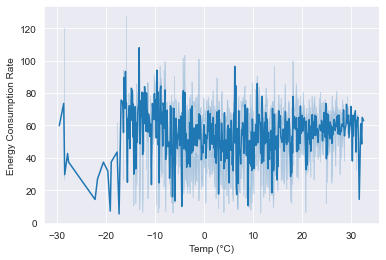

In [15]:
sns.lineplot(data=hare, x=hare['Temp (°C)'], y='Energy Consumption Rate')

In [16]:
hare_daily = hare.groupby([hare['DateTime'].dt.date]).mean()
hare_daily['Energy Consumption Rate'] = hare_daily['Energy consumed driving'] / hare_daily['Time driving consuming']
hare_daily
km_daily = pd.read_csv('../data/historical_data/Daily Mileage by Bus Report for 2021-12-01 - 2022-10-01.csv', skiprows=3)

In [17]:
km_daily = km_daily.set_index('Bus')
km_daily = km_daily.transpose()

In [18]:
km_daily.index = pd.to_datetime(km_daily.index)

In [19]:
hare_km = km_daily['1030_Hare']

In [20]:
hare_daily.index = pd.to_datetime(hare_daily.index)

In [21]:
hare_daily = hare_daily.merge(how='left', right=hare_km, left_on=hare_daily.index, right_on=hare_km.index)

<AxesSubplot:xlabel='Temp (°C)', ylabel='Energy Consumption Rate'>

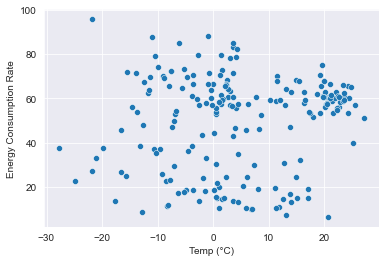

In [22]:
sns.scatterplot(data=hare_daily, x=hare_daily['Temp (°C)'], y='Energy Consumption Rate')

In [23]:
hare_daily.rename(columns={'1030_Hare':'Kilometers'}, inplace=True)
hare_daily

,key_0,Energy consumed driving,SOC used driving,SOC used idling,Time charging,Time driving consuming,Time driving,Longitude (x),Latitude (y),Year,...,Day,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Precip. Amount (mm),Wind Dir (10s deg),Wind Spd (km/h),Wind Chill,Energy Consumption Rate,Kilometers
0,2021-12-03,1.258913,NaN,NaN,NaN,0.033848,NaN,-115.55,51.19,2021.0,...,3.0,-9.550000,-12.400000,79.500000,0.000,25.500000,6.500000,-13.000000,37.192900,0
1,2021-12-04,1.047778,NaN,NaN,NaN,0.040707,NaN,-115.55,51.19,2021.0,...,4.0,-9.200000,-12.000000,80.000000,0.000,23.000000,10.000000,-14.000000,25.739364,0
2,2021-12-06,27.723441,NaN,NaN,NaN,0.442844,NaN,-115.55,51.19,2021.0,...,6.0,-11.700000,-15.781818,71.909091,0.000,23.090909,11.909091,-17.818182,62.603245,124
3,2021-12-07,2.971519,0.509840,0.436675,NaN,0.063261,NaN,-115.55,51.19,2021.0,...,7.0,-7.400000,-11.800000,71.000000,0.000,24.000000,18.000000,-14.000000,46.972698,0
4,2021-12-08,0.705266,0.123138,0.305640,0.431364,0.038163,NaN,-115.55,51.19,2021.0,...,8.0,-4.850000,-9.375000,70.750000,0.125,24.750000,8.000000,-8.500000,18.480334,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2022-09-04,23.543151,2.843473,0.489723,NaN,0.381649,NaN,-115.55,51.19,2022.0,...,4.0,21.144444,3.994444,34.944444,0.000,23.111111,12.277778,NaN,61.688038,227
213,2022-09-06,0.917744,0.165173,0.377729,NaN,0.029953,NaN,-115.55,51.19,2022.0,...,6.0,12.700000,-0.400000,40.000000,0.000,7.000000,3.000000,NaN,30.639696,0
214,2022-09-07,0.082656,0.014957,0.037658,NaN,0.013070,NaN,-115.55,51.19,2022.0,...,7.0,20.700000,3.200000,32.000000,0.000,21.000000,13.000000,NaN,6.323966,0
215,2022-09-08,0.362040,0.059712,0.019869,NaN,0.024179,NaN,-115.55,51.19,2022.0,...,8.0,2.000000,-2.200000,74.000000,0.000,1.000000,3.000000,NaN,14.973049,0


In [24]:
hare_daily.set_index('key_0')

,Energy consumed driving,SOC used driving,SOC used idling,Time charging,Time driving consuming,Time driving,Longitude (x),Latitude (y),Year,Month,Day,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Precip. Amount (mm),Wind Dir (10s deg),Wind Spd (km/h),Wind Chill,Energy Consumption Rate,Kilometers
key_0,,,,,,,,,,,,,,,,,,,,
2021-12-03,1.258913,NaN,NaN,NaN,0.033848,NaN,-115.55,51.19,2021.0,12.0,3.0,-9.550000,-12.400000,79.500000,0.000,25.500000,6.500000,-13.000000,37.192900,0
2021-12-04,1.047778,NaN,NaN,NaN,0.040707,NaN,-115.55,51.19,2021.0,12.0,4.0,-9.200000,-12.000000,80.000000,0.000,23.000000,10.000000,-14.000000,25.739364,0
2021-12-06,27.723441,NaN,NaN,NaN,0.442844,NaN,-115.55,51.19,2021.0,12.0,6.0,-11.700000,-15.781818,71.909091,0.000,23.090909,11.909091,-17.818182,62.603245,124
2021-12-07,2.971519,0.509840,0.436675,NaN,0.063261,NaN,-115.55,51.19,2021.0,12.0,7.0,-7.400000,-11.800000,71.000000,0.000,24.000000,18.000000,-14.000000,46.972698,0
2021-12-08,0.705266,0.123138,0.305640,0.431364,0.038163,NaN,-115.55,51.19,2021.0,12.0,8.0,-4.850000,-9.375000,70.750000,0.125,24.750000,8.000000,-8.500000,18.480334,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-04,23.543151,2.843473,0.489723,NaN,0.381649,NaN,-115.55,51.19,2022.0,9.0,4.0,21.144444,3.994444,34.944444,0.000,23.111111,12.277778,NaN,61.688038,227
2022-09-06,0.917744,0.165173,0.377729,NaN,0.029953,NaN,-115.55,51.19,2022.0,9.0,6.0,12.700000,-0.400000,40.000000,0.000,7.000000,3.000000,NaN,30.639696,0
2022-09-07,0.082656,0.014957,0.037658,NaN,0.013070,NaN,-115.55,51.19,2022.0,9.0,7.0,20.700000,3.200000,32.000000,0.000,21.000000,13.000000,NaN,6.323966,0


In [25]:
hare_daily.rename(index={'key_0':'Datetime'},inplace=True)

In [26]:
hare_daily['Energy Consumed per Km'] = hare_daily['Energy consumed driving'] / hare_daily['Kilometers']
hare_daily.replace([np.inf, -np.inf], np.nan, inplace=True)
hare_daily = hare_daily.dropna(subset='Energy Consumed per Km')

In [27]:
std = hare_daily['Energy Consumed per Km'].std()
std_dev =  hare_daily['Energy Consumed per Km'].mean() +  std * 2
hare_daily = hare_daily[hare_daily['Energy Consumed per Km'] < std_dev]

<AxesSubplot:xlabel='Temp (°C)', ylabel='Energy Consumed per Km'>

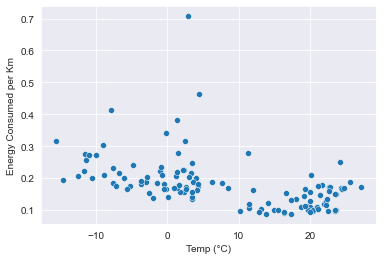

In [28]:
sns.scatterplot(data=hare_daily, x='Temp (°C)', y='Energy Consumed per Km')

<AxesSubplot:xlabel='Temp (°C)', ylabel='Energy Consumed per Km'>

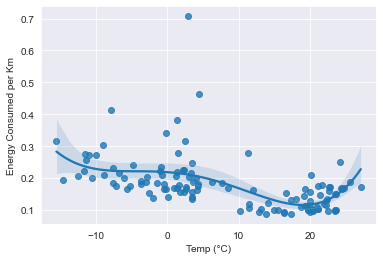

In [29]:
sns.regplot(data=hare_daily, x='Temp (°C)', y='Energy Consumed per Km', order=4)

<AxesSubplot:xlabel='Temp (°C)', ylabel='Energy Consumed per Km'>

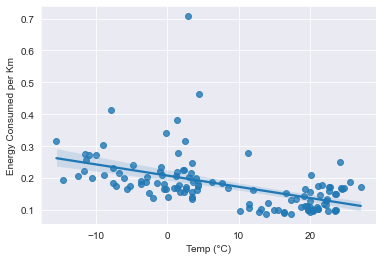

In [30]:
sns.regplot(data=hare_daily, x='Temp (°C)', y='Energy Consumed per Km')

<AxesSubplot:xlabel='Temp (°C)', ylabel='Energy Consumption Rate'>

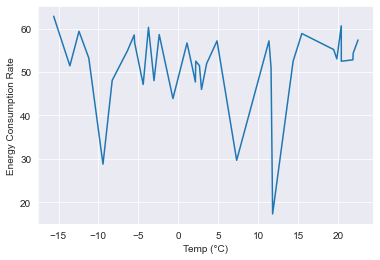

In [31]:
hare_weekly = hare.groupby([pd.Grouper(key='DateTime', freq='W')]).mean()
sns.lineplot(data=hare_weekly, x='Temp (°C)', y='Energy Consumption Rate')

In [32]:
km_daily.columns

Index(['1012_WinterLynx', '1001_SummerGrizzly', '1002_WinterWolf',
       '1006_SummerSheep', '1017_FallCoyote', '1019_WinterMuleDeer',
       '1026_MCI_Elk', '1029_MCI_Wolf', '1023_SpringGrizzly', '1005_FallMoose',
       '1018_SummerBeaver', '1022_Marmot', '1024_SummerLynx', '1028_MCI_Bison',
       '1031_Marten', '1033_SummerWolf', '1014_SpringBlackBear', '1030_Hare',
       '1021_SummerFox', '1015_Trout', '1013_WinterElk', '1027_MCI_Moose',
       '1035_SpringCougar', '1007_CutawayDeer', '1034_SummerMoose',
       '1008_CutawayFox', '1011_SummerCougar'],
      dtype='object', name='Bus')

In [33]:
set(beb_data['Bus'])

{'1030 - Hare',
 '1031 - Marten',
 '1033 - Wolf',
 '1034 - Moose',
 '1035 - Cougar'}

In [34]:
marten = beb_data[beb_data['Bus'] == '1031 - Marten']
marten_daily = marten.groupby([marten['DateTime'].dt.date]).mean()
marten_daily['Energy Consumption Rate'] = marten_daily['Energy consumed driving'] / marten_daily['Time driving consuming']
marten_km = km_daily['1031_Marten']
marten_daily = marten_daily.set_index( pd.to_datetime(marten_daily.index))
marten_daily = marten_daily.merge(how='left', right=marten_km, left_on=marten_daily.index, right_on=marten_km.index)
marten_daily.rename(columns={'1031_Marten':'Kilometers'}, inplace=True)
marten_daily.set_index('key_0')
marten_daily['Energy Consumed per Km'] = marten_daily['Energy consumed driving'] / marten_daily['Kilometers']
marten_daily.replace([np.inf, -np.inf], np.nan, inplace=True)

std = marten_daily['Energy Consumed per Km'].std()
std_dev =  marten_daily['Energy Consumed per Km'].mean() +  std * 2
marten_daily = marten_daily[marten_daily['Energy Consumed per Km'] < std_dev]

In [35]:
wolf = beb_data[beb_data['Bus'] == '1033 - Wolf']
wolf_daily = wolf.groupby([wolf['DateTime'].dt.date]).mean()
wolf_daily['Energy Consumption Rate'] = wolf_daily['Energy consumed driving'] / wolf_daily['Time driving consuming']
wolf_km = km_daily['1033_SummerWolf']
wolf_daily = wolf_daily.set_index( pd.to_datetime(wolf_daily.index))
wolf_daily = wolf_daily.merge(how='left', right=wolf_km, left_on=wolf_daily.index, right_on=wolf_km.index)
wolf_daily.rename(columns={'1033_SummerWolf':'Kilometers'}, inplace=True)
wolf_daily.set_index('key_0')
wolf_daily['Energy Consumed per Km'] = wolf_daily['Energy consumed driving'] / wolf_daily['Kilometers']
wolf_daily.replace([np.inf, -np.inf], np.nan, inplace=True)

std = wolf_daily['Energy Consumed per Km'].std()
std_dev =  wolf_daily['Energy Consumed per Km'].mean() +  std * 2
wolf_daily = wolf_daily[wolf_daily['Energy Consumed per Km'] < std_dev]

In [36]:
moose = beb_data[beb_data['Bus'] == '1034 - Moose']
moose_daily = moose.groupby([moose['DateTime'].dt.date]).mean()
moose_daily['Energy Consumption Rate'] = moose_daily['Energy consumed driving'] / moose_daily['Time driving consuming']
moose_km = km_daily['1034_SummerMoose']
moose_daily = moose_daily.set_index( pd.to_datetime(moose_daily.index))
moose_daily = moose_daily.merge(how='left', right=moose_km, left_on=moose_daily.index, right_on=moose_km.index)
moose_daily.rename(columns={'1034_SummerMoose':'Kilometers'}, inplace=True)
moose_daily.set_index('key_0')
moose_daily['Energy Consumed per Km'] = moose_daily['Energy consumed driving'] / moose_daily['Kilometers']
moose_daily.replace([np.inf, -np.inf], np.nan, inplace=True)

std = moose_daily['Energy Consumed per Km'].std()
std_dev =  moose_daily['Energy Consumed per Km'].mean() +  std * 2
moose_daily = moose_daily[moose_daily['Energy Consumed per Km'] < std_dev]

In [38]:
cougar = beb_data[beb_data['Bus'] == '1035 - Cougar']
cougar_daily = cougar.groupby([cougar['DateTime'].dt.date]).mean()
cougar_daily['Energy Consumption Rate'] = cougar_daily['Energy consumed driving'] / cougar_daily['Time driving consuming']
cougar_km = km_daily['1035_SpringCougar']
cougar_daily = cougar_daily.set_index( pd.to_datetime(cougar_daily.index))
cougar_daily = cougar_daily.merge(how='left', right=cougar_km, left_on=cougar_daily.index, right_on=cougar_km.index)
cougar_daily.rename(columns={'1035_SpringCougar':'Kilometers'}, inplace=True)
cougar_daily.set_index('key_0')
cougar_daily['Energy Consumed per Km'] = cougar_daily['Energy consumed driving'] / cougar_daily['Kilometers']
cougar_daily.replace([np.inf, -np.inf], np.nan, inplace=True)

std = cougar_daily['Energy Consumed per Km'].std()
std_dev =  cougar_daily['Energy Consumed per Km'].mean() +  std * 2
cougar_daily = cougar_daily[cougar_daily['Energy Consumed per Km'] < std_dev]

In [40]:
hare_daily['Bus'] = '1030_Hare'
marten_daily['Bus'] = '1031_Marten'
moose_daily['Bus'] = '1034_SummerMoose'
wolf_daily['Bus'] = '1033_SummerWolf'
cougar_daily['Bus'] = '1035_SpringCougar'
daily = pd.concat([hare_daily, marten_daily, moose_daily, wolf_daily, cougar_daily])


In [ ]:
daily

In [45]:
std = daily['Energy Consumed per Km'].std()
std_dev_95 =  daily['Energy Consumed per Km'].mean() +  std * 2
std_dev_5 =  daily['Energy Consumed per Km'].mean() -  std * 2
daily = daily[(daily['Energy Consumed per Km'] < std_dev_95) & (daily['Energy Consumed per Km'] > std_dev_5)]

<AxesSubplot:xlabel='Temp (°C)', ylabel='Energy Consumed per Km'>

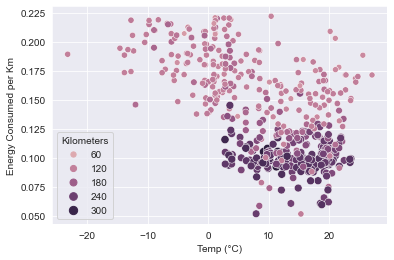

In [46]:
sns.color_palette("mako", as_cmap=True)
sns.scatterplot(data=daily, x='Temp (°C)', y='Energy Consumed per Km', hue='Kilometers', size='Kilometers')

<AxesSubplot:xlabel='Temp (°C)', ylabel='Energy Consumed per Km'>

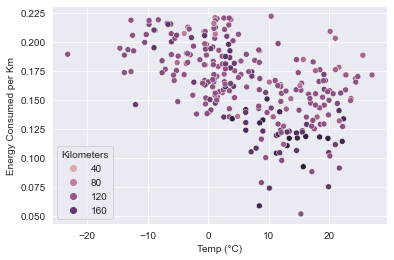

In [47]:
sns.scatterplot(data=daily[daily['Kilometers'] < 200], x='Temp (°C)', y='Energy Consumed per Km',  hue='Kilometers')

<AxesSubplot:xlabel='Temp (°C)', ylabel='Energy Consumed per Km'>

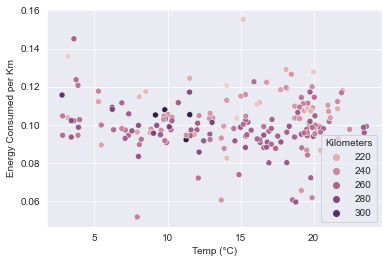

In [48]:
sns.scatterplot(data=daily[daily['Kilometers'] > 200], x='Temp (°C)', y='Energy Consumed per Km', hue='Kilometers')

In [49]:
daily.to_csv('../data/beb_energy_consumption.csv')

In [50]:
beb_data.to_csv('../data/hourly_beb_data.csv')